In [1]:
import tensorflow as tf
import IPython.display as display
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!ls /home/yct/data/imagenet_small/

imagenet-sample-train.tar.gz  imagenet_train_labeled_128.tfrecords  train


In [3]:
IMAGE_SIZE = 128
BATCH_SIZE = 64
BUFFER_SIZE = 1000

In [4]:
filename = '/home/yct/data/imagenet_small/imagenet_train_labeled_128.tfrecords'
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [5]:
# Create a dictionary describing the features.
image_feature_description = {
#     'height': tf.io.FixedLenFeature([], tf.int64),
#     'width': tf.io.FixedLenFeature([], tf.int64),
#     'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  parsed_sample = tf.io.parse_single_example(example_proto, image_feature_description)
  return parsed_sample['image_raw'], parsed_sample['label']

parsed_dataset = raw_dataset.map(_parse_image_function)
parsed_dataset

<MapDataset shapes: ((), ()), types: (tf.string, tf.int64)>

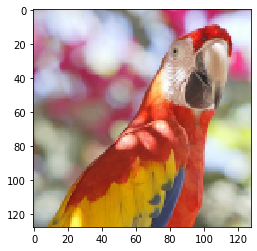

In [6]:
sample = next(iter(parsed_dataset.take(1)))
image = tf.io.decode_raw(sample[0], tf.uint8)
image.set_shape(128 * 128 * 3)
image = tf.reshape(image, [128, 128, 3])
image = image.numpy()
image.max(), image.min()
# display.display(display.Image(data=image))
plt.imshow(image)
plt.show()

In [7]:
def preprocess(image, label):
    image = tf.io.decode_raw(image, tf.uint8)
    image.set_shape(IMAGE_SIZE * IMAGE_SIZE * 3)
    image = tf.reshape(image, [IMAGE_SIZE, IMAGE_SIZE, 3])
    image = tf.cast(image, tf.float32) * (2. / 255) - 1.
    label = tf.cast(label, tf.int32)
    
    return image, label

In [10]:
dataset = parsed_dataset.shuffle(BUFFER_SIZE).map(preprocess).batch(BATCH_SIZE)
sample = next(iter(dataset.take(1)))
sample[0].shape, sample[1]

(TensorShape([64, 128, 128, 3]),
 <tf.Tensor: id=68, shape=(64,), dtype=int32, numpy=
 array([177, 117, 455, 176,   0, 432, 528,  63, 572,  85,   7, 655, 677,
        704, 693,  79,  75, 162, 461,  73, 607, 290, 529, 727, 448,  90,
         73, 194, 457, 495, 658, 440, 414, 271, 737,  12, 247,  61, 505,
        693, 497, 623, 456, 584, 200, 185, 262, 100, 327, 259,  40, 221,
        591,  81, 487, 170, 437, 407, 202,  93, 581, 186, 527, 679],
       dtype=int32)>)